# MSc AI – SIS6117 [Assignment 1]

# 2423119 SUMMUN Roshan

### CASE STUDY 2 – Machine Learning: Classfication Models 

### Install and import required libraries if not already installed

In [172]:
import warnings
warnings.filterwarnings('ignore')

# !pip install pandas numpy matplotlib seaborn scikit-learn imblearn

Import Libraries


In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from matplotlib.colors import ListedColormap
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None) # display all columns in DataFrame output

# Exploratory Data Analysis (EDA)


Load and Display data


In [174]:
df = pd.read_csv('weatherAUS.csv')
print("Dataset Shape:", df.shape)

Dataset Shape: (145460, 23)


In [175]:
df.columns


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [176]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


See unique values in RainToday and RainTomorrow (Target) columns

In [177]:
# See unique values in RainToday and RainTomorrow columns
print("RainToday:", df['RainToday'].unique())
print("RainTomorrow:", df['RainTomorrow'].unique())

RainToday: ['No' 'Yes' nan]
RainTomorrow: ['No' 'Yes' nan]


Check for missing values

In [178]:
def check_missing_values(df):
    print("\nMissing values:")
    missing_values = df.isnull().sum()
    data_types = df.dtypes
    
    # print as a dataframe
    missing_df = pd.concat([missing_values, data_types], axis=1)
    missing_df.columns = ['Missing Values', 'Data Type']
    print(missing_df)
    
        
check_missing_values(df)


Missing values:
               Missing Values Data Type
Date                        0    object
Location                    0    object
MinTemp                  1485   float64
MaxTemp                  1261   float64
Rainfall                 3261   float64
Evaporation             62790   float64
Sunshine                69835   float64
WindGustDir             10326    object
WindGustSpeed           10263   float64
WindDir9am              10566    object
WindDir3pm               4228    object
WindSpeed9am             1767   float64
WindSpeed3pm             3062   float64
Humidity9am              2654   float64
Humidity3pm              4507   float64
Pressure9am             15065   float64
Pressure3pm             15028   float64
Cloud9am                55888   float64
Cloud3pm                59358   float64
Temp9am                  1767   float64
Temp3pm                  3609   float64
RainToday                3261    object
RainTomorrow             3267    object


# Data Preprocessing

Convert 'Yes' and 'No' to 1 and 0 in RainToday and RainTomorrow

In [179]:
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

Check the changes

In [180]:
print(df['RainToday'].value_counts())
print("\n",df['RainTomorrow'].value_counts())

RainToday
0.0    110319
1.0     31880
Name: count, dtype: int64

 RainTomorrow
0.0    110316
1.0     31877
Name: count, dtype: int64


Get numerical and categorical columns

In [181]:
# create a dataframe with numerical columns and categorical columns
contin = df.select_dtypes(include=[np.number]).columns
categorical = df.select_dtypes(include=[object]).columns

print( "Numerical Columns:\n",contin)
print( "\nCategorical Columns:\n",categorical)

Numerical Columns:
 Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Categorical Columns:
 Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')


Fill missing values in categorical columns with mode



In [182]:
# Create a dictionary of modes for each categorical column
modes = {column: df[column].mode()[0] for column in categorical}
print('Modes: ', modes)
# Fill missing values using the dictionary
df[categorical] = df[categorical].fillna(modes)

# Check missing values for categorical columns
check_missing_values(df[categorical])

Modes:  {'Date': '2013-03-01', 'Location': 'Canberra', 'WindGustDir': 'W', 'WindDir9am': 'N', 'WindDir3pm': 'SE'}

Missing values:
             Missing Values Data Type
Date                      0    object
Location                  0    object
WindGustDir               0    object
WindDir9am                0    object
WindDir3pm                0    object


Encode categorical columns using Label Encoder

In [183]:
print("Before Encoding:")
df[categorical] # display categorical columns

Before Encoding:


,Date,Location,WindGustDir,WindDir9am,WindDir3pm
0,2008-12-01,Albury,W,W,WNW
1,2008-12-02,Albury,WNW,NNW,WSW
2,2008-12-03,Albury,WSW,W,WSW
3,2008-12-04,Albury,NE,SE,E
4,2008-12-05,Albury,W,ENE,NW
...,...,...,...,...,...
145455,2017-06-21,Uluru,E,SE,ENE
145456,2017-06-22,Uluru,NNW,SE,N
145457,2017-06-23,Uluru,N,SE,WNW
145458,2017-06-24,Uluru,SE,SSE,N


In [184]:
# Encode categorical columns using label encoder
le = LabelEncoder()
for column in categorical:
    df[column] = le.fit_transform(df[column])

print("After Encoding:")
df[categorical] # display encoded categorical columns

After Encoding:


,Date,Location,WindGustDir,WindDir9am,WindDir3pm
0,396,2,13,13,14
1,397,2,14,6,15
2,398,2,15,13,15
3,399,2,4,9,0
4,400,2,13,1,7
...,...,...,...,...,...
145455,3431,41,0,9,1
145456,3432,41,6,9,3
145457,3433,41,3,9,14
145458,3434,41,9,10,3


Check missing values in numerical columns

In [185]:
# Check missing values for numerical columns with percentage
missing_values = df[contin].isnull().sum()
missing_percentage = (missing_values / len(df)) * 100 
missing_df = pd.concat([missing_values, missing_percentage], axis=1)
missing_df.columns = ['Missing Values', '%']
print(missing_df)

               Missing Values          %
MinTemp                  1485   1.020899
MaxTemp                  1261   0.866905
Rainfall                 3261   2.241853
Evaporation             62790  43.166506
Sunshine                69835  48.009762
WindGustSpeed           10263   7.055548
WindSpeed9am             1767   1.214767
WindSpeed3pm             3062   2.105046
Humidity9am              2654   1.824557
Humidity3pm              4507   3.098446
Pressure9am             15065  10.356799
Pressure3pm             15028  10.331363
Cloud9am                55888  38.421559
Cloud3pm                59358  40.807095
Temp9am                  1767   1.214767
Temp3pm                  3609   2.481094
RainToday                3261   2.241853
RainTomorrow             3267   2.245978


Null RainToday and RainTomorrow is only 2% of the dataset
- Let's drop them

In [186]:
df = df.dropna(subset=['RainToday', 'RainTomorrow'])


Fill missing values in numerical columns with mean

In [187]:
# Create imputer for numerical values
num_imputer = SimpleImputer(strategy='mean')
df[contin] = num_imputer.fit_transform(df[contin]) # fill missing values

check_missing_values(df)



Missing values:
               Missing Values Data Type
Date                        0     int64
Location                    0     int64
MinTemp                     0   float64
MaxTemp                     0   float64
Rainfall                    0   float64
Evaporation                 0   float64
Sunshine                    0   float64
WindGustDir                 0     int64
WindGustSpeed               0   float64
WindDir9am                  0     int64
WindDir3pm                  0     int64
WindSpeed9am                0   float64
WindSpeed3pm                0   float64
Humidity9am                 0   float64
Humidity3pm                 0   float64
Pressure9am                 0   float64
Pressure3pm                 0   float64
Cloud9am                    0   float64
Cloud3pm                    0   float64
Temp9am                     0   float64
Temp3pm                     0   float64
RainToday                   0   float64
RainTomorrow                0   float64


Check for outliers in numerical columns

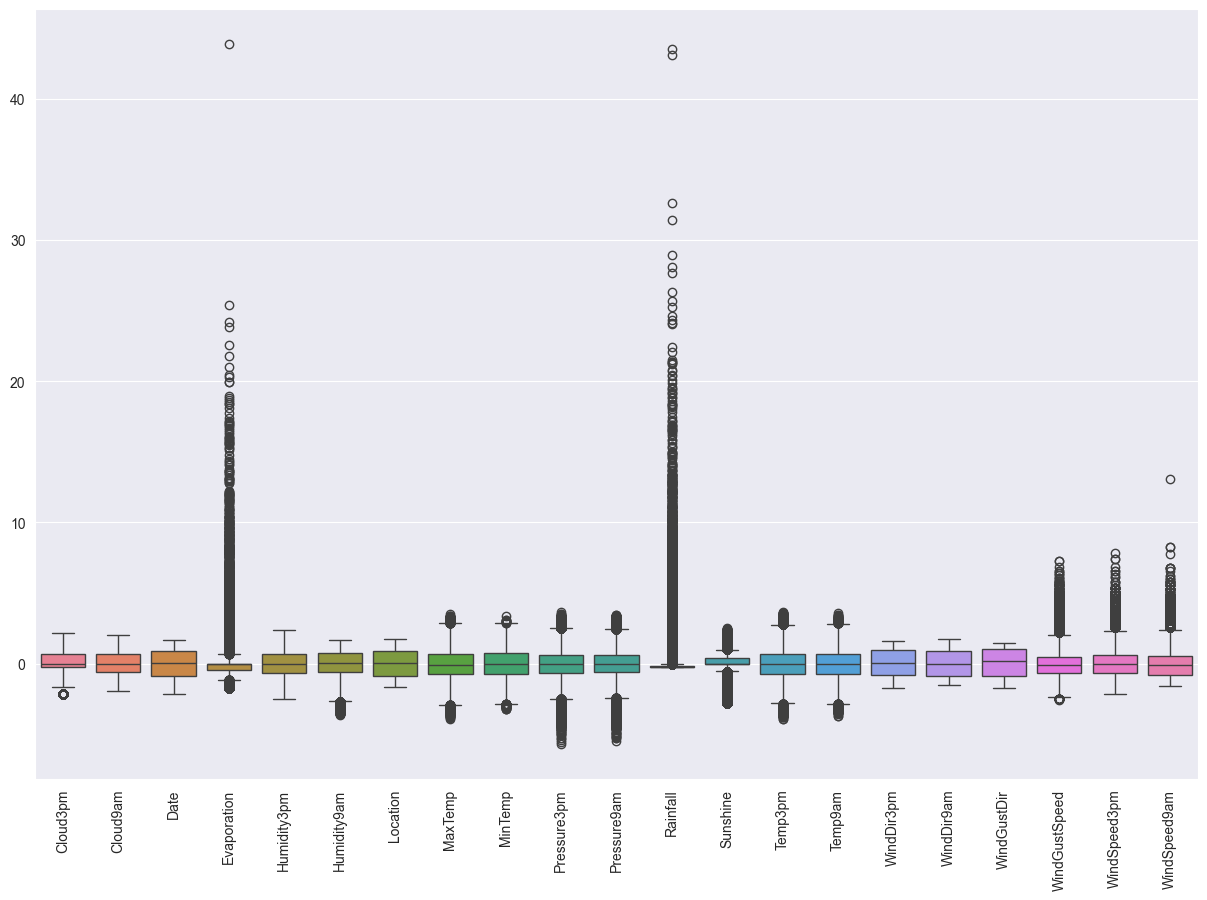

In [188]:
def check_outliers(df):
    # exclude columns RainToday and RainTomorrow
    contin = df.select_dtypes(include=[np.number]).columns.difference(['RainToday', 'RainTomorrow'])
    
    # Set up a standard scaler for the features
    scaler = StandardScaler()
    df[contin] = scaler.fit_transform(df[contin])
    
    # Check for outliers in numerical columns
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df[contin])
    plt.xticks(rotation=90)
    plt.show()
    
check_outliers(df)


Remove outliers using IQR method in Rainfall, Evaporation, windGustSpeed, windspeed3am, windspeed9am
- Replaces values below lower bound with the lower bound value
- Replaces values above upper bound with the upper bound valuemns

Rainfall: found 25228 outliers
Evaporation: found 29098 outliers
WindGustSpeed: found 5314 outliers
WindSpeed9am: found 2285 outliers
WindSpeed3pm: found 2420 outliers


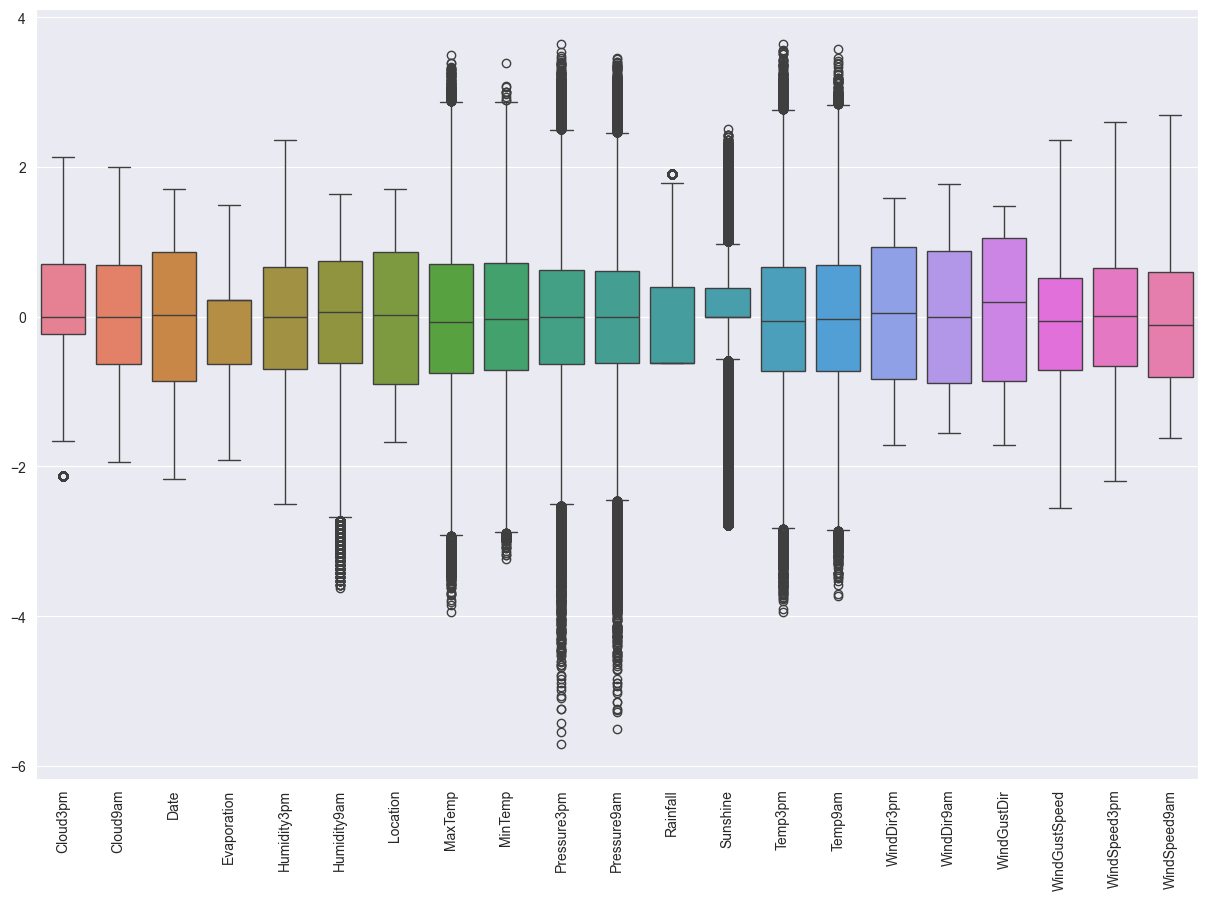

In [189]:
def handle_outliers(df, columns):
    df_clean = df.copy()
    
    for col in columns:
        Q1, Q3 = df_clean[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        
        # Count outliers
        outliers = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()
        print(f"{col}: found {outliers} outliers")
        
        # Replace outliers with bounds instead of removing
        df_clean.loc[df_clean[col] < lower_bound, col] = lower_bound  # Replace with lower bound
        df_clean.loc[df_clean[col] > upper_bound, col] = upper_bound  # Replace with upper bound
    
    return df_clean

# Apply to specific columns
df = handle_outliers(df, ['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'])

# Check for outliers in numerical columns
check_outliers(df)


### ⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯
###                           ✧ Question 1 ✧                           
### ⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯

### Data Preprocessing


Check target variable distribution

In [190]:
# Check value_counts for RainTomorrow
print(df['RainTomorrow'].value_counts(normalize=True))

RainTomorrow
0.0    0.778382
1.0    0.221618
Name: proportion, dtype: float64


The target variable is imbalanced with 22% of 'Yes' and 78% of 'No'

### Split the data before dealing with imbalanced data


In [191]:
# Split the data into features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (112629, 22)
Testing set shape: (28158, 22)


Rebalance the data using **UNDERSAMPLING**  on the train set, not to the test set
- Randomly remove samples from the majority class to balance the dataset

In [192]:
# Undersample the majority class
rus = RandomUnderSampler(random_state=2024, sampling_strategy = 'majority')

X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

print("Training set shape after under-sampling:", X_train_under.shape)
print("Testing set shape after under-sampling:", X_test.shape)

print(type(y_train_under))
    

Training set shape after under-sampling: (49834, 22)
Testing set shape after under-sampling: (28158, 22)
<class 'pandas.core.series.Series'>


### Standardize (Scale) Features and Target Variables

In [193]:
# Standardize the under-sampled training set 
scaler_under = StandardScaler()
X_train_under = scaler_under.fit_transform(X_train_under)
X_test = scaler_under.transform(X_test)


### ⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯
###                           ✧ Question 2 ✧                           
### ⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯

###  A. Linear Discriminant Analysis (LDA) Classifier

According to Scikit-learn:
- A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.
- Fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.

In [194]:
# Create an LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_under, y_train_under)

LinearDiscriminantAnalysis()

### B. Gradient Boosting Classifier (Ensemble)

According to Scikit-learn:
- Gradient Boosting builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions.
- In each stage, a regression tree is fit on the negative gradient of the given loss function.

In [195]:
gb_model = GradientBoostingClassifier(random_state=2024)
gb_model.fit(X_train_under, y_train_under)


GradientBoostingClassifier(random_state=2024)

### C. Multi-layer Perceptron classifier (Neural Network)

According to Scikit-learn:
- This model optimizes the log-loss function using LBFGS or stochastic gradient descent.
- hidden_layer_sizesarray-like of shape(n_layers - 2,), default=(100,)
- activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
- solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’

In [196]:
mlp_model = MLPClassifier(random_state=2024)
mlp_model.fit(X_train_under, y_train_under)


MLPClassifier(random_state=2024)

### ⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯
###                           ✧ Question 3 ✧                           
### ⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯
### Make Predictions


In [197]:
# A. Linear Discriminant Analysis (LDA) Classifier
lda_pred = lda_model.predict(X_test)

# B. Gradient Boosting Classifier (Ensemble)
gb_pred = gb_model.predict(X_test)

# C. Multi-layer Perceptron classifier (Neural Network)
mlp_pred = mlp_model.predict(X_test)

### Compare the predictions

In [198]:
# Create a DataFrame to compare the predictions
predictions = pd.DataFrame({'Actual': y_test, 'LDA': lda_pred, 'GB': gb_pred, 'MLP': mlp_pred})

print("Predictions Test Set vs Models:")

# replace 1 with 'Yes' and 0 with 'No'
predictions = predictions.replace({1: 'Yes', 0: 'No'})
predictions

Predictions Test Set vs Models:


,Actual,LDA,GB,MLP
80443,No,No,Yes,Yes
115188,No,No,No,No
101461,Yes,Yes,Yes,Yes
60059,No,No,No,No
67139,Yes,Yes,Yes,Yes
...,...,...,...,...
127006,Yes,Yes,Yes,Yes
112874,No,No,No,No
143158,No,No,No,No
28764,No,No,No,No


### ⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯
###                           ✧ Question 4 ✧                           
### ⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯
### Plot the training data, test set and the models

### Identify Top Feature Importances

- Plotted the Decision Boundary for each model using the top 2 features
- Plotting the True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) for each model

- For Gradient Boosting Classifier:

In [199]:
feature_importances = pd.Series(gb_model.feature_importances_, index=X_train.columns)
lda_top_features  = feature_importances.nlargest(2).index.tolist()

print("Top 2 Features for Gradient Boosting Classifier: ", lda_top_features )


Top 2 Features for Gradient Boosting Classifier:  ['Humidity3pm', 'Pressure3pm']


- For LDA:

In [200]:
coef_importances = pd.Series(abs(lda_model.coef_[0]), index=X_train.columns)
gb_top_features  = coef_importances.nlargest(2).index.tolist()

print("Top 2 Features for Gradient Boosting Classifier: ", gb_top_features )


Top 2 Features for Gradient Boosting Classifier:  ['Pressure3pm', 'Humidity3pm']


- For MLP:
    - MLP doesn't provide feature importances directly, but you can use permutation importance:

In [201]:
result = permutation_importance(mlp_model, X_test, y_test, n_repeats=10, random_state=2024)
perm_importances = pd.Series(result.importances_mean, index=X_train.columns)
mlp_top_features  = perm_importances.nlargest(2).index.tolist()

print("Top 2 Features for Gradient Boosting Classifier: ", mlp_top_features )


Top 2 Features for Gradient Boosting Classifier:  ['Pressure3pm', 'Humidity3pm']


### 2. Visualize Decision Boundaries

In [202]:
# Convert X_train_under and X_test which are np arrays back to DataFrame
feature_names = X_train.columns
X_train_under = pd.DataFrame(X_train_under, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)


In [203]:
def plot_decision_boundary(model, X, y, title, feature_names):
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    from matplotlib.lines import Line2D

    # Convert to numpy arrays if they aren't already
    X_array = X.values if hasattr(X, 'values') else np.array(X)
    y_array = y.values if hasattr(y, 'values') else np.array(y)

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 0.2
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, num=1000),
                         np.linspace(y_min, y_max, num=1000))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Get model predictions
    y_pred = model.predict(X_array)
    
    # Create masks for different categories
    tp_mask = (y_array == 1) & (y_pred == 1)  # True Positives
    tn_mask = (y_array == 0) & (y_pred == 0)  # True Negatives
    fp_mask = (y_array == 0) & (y_pred == 1)  # False Positives
    fn_mask = (y_array == 1) & (y_pred == 0)  # False Negatives

    # Colors for the plot with increased contrast
    cmap_light = ListedColormap(['#A5D6A7', '#EF9A9A'])  # More intense light green and light red
    green = '#388E3C'  # Darker green for correct predictions
    red = '#D32F2F'    # Darker red for incorrect predictions

    plt.figure(figsize=(12,10))
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=cmap_light, zorder=1)

    plt.contour(xx, yy, Z, levels=[0.5], linewidths=1.5, 
                colors='#9933ff', linestyles='-', zorder=4)

    # Plot correct predictions (green circles) with sharper edge
    plt.scatter(X_array[tn_mask, 0], X_array[tn_mask, 1], 
               color=green, marker='o', s=25, alpha=0.8, linewidth=0.5, 
               edgecolor='black', zorder=2)
    
    plt.scatter(X_array[tp_mask, 0], X_array[tp_mask, 1], 
               color=green, marker='o', s=25, alpha=0.8, linewidth=0.5, 
               edgecolor='black', zorder=2)

    # Plot incorrect predictions (red triangles) with sharper edge
    plt.scatter(X_array[fp_mask, 0], X_array[fp_mask, 1], 
               color=red, marker='^', s=20, alpha=0.8, linewidth=0.5, 
               edgecolor='black', zorder=3)
    
    plt.scatter(X_array[fn_mask, 0], X_array[fn_mask, 1], 
               color=red, marker='^', s=20, alpha=0.8, linewidth=0.5, 
               edgecolor='black', zorder=3)

    plt.title(title, fontsize=16, pad=20)
    plt.xlabel(feature_names[0], fontsize=14, labelpad=10)
    plt.ylabel(feature_names[1], fontsize=14, labelpad=10)

    # Updated legend - green for correct, red for incorrect
    handles = [
        # Correct predictions (green)
        Line2D([], [], marker='o', color='w', label='True Negative (TN)',
               markerfacecolor=green, markeredgecolor='black', 
               markersize=10, markeredgewidth=0.5),
        Line2D([], [], marker='o', color='w', label='True Positive (TP)',
               markerfacecolor=green, markeredgecolor='black', 
               markersize=10, markeredgewidth=0.5),
        # Incorrect predictions (red)
        Line2D([], [], marker='^', color='w', label='False Positive (FP)',
               markerfacecolor=red, markeredgecolor='black', 
               markersize=10, markeredgewidth=0.5),
        Line2D([], [], marker='^', color='w', label='False Negative (FN)',
               markerfacecolor=red, markeredgecolor='black', 
               markersize=10, markeredgewidth=0.5)
    ]
    
    plt.legend(handles=handles, title='Classes', fontsize=12, 
               title_fontsize=12, framealpha=0.9)
    
    plt.grid(True, linestyle=':', color='gray', alpha=0.5, zorder=0)
    plt.show()


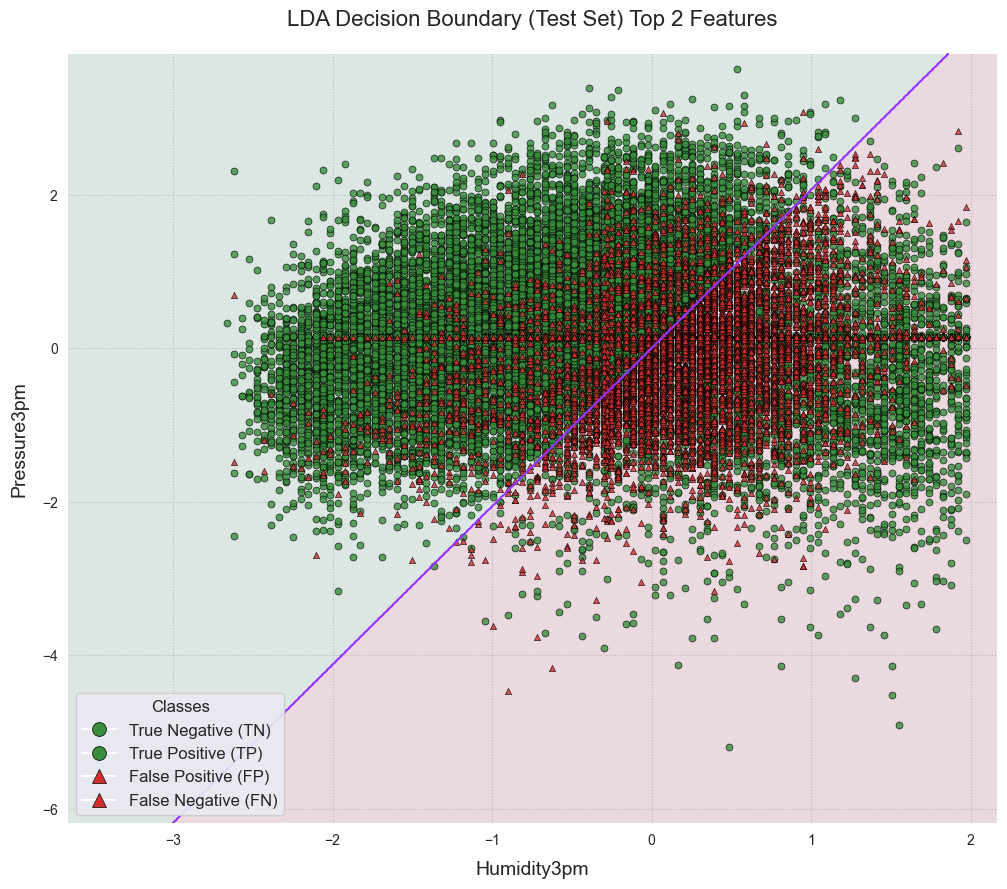

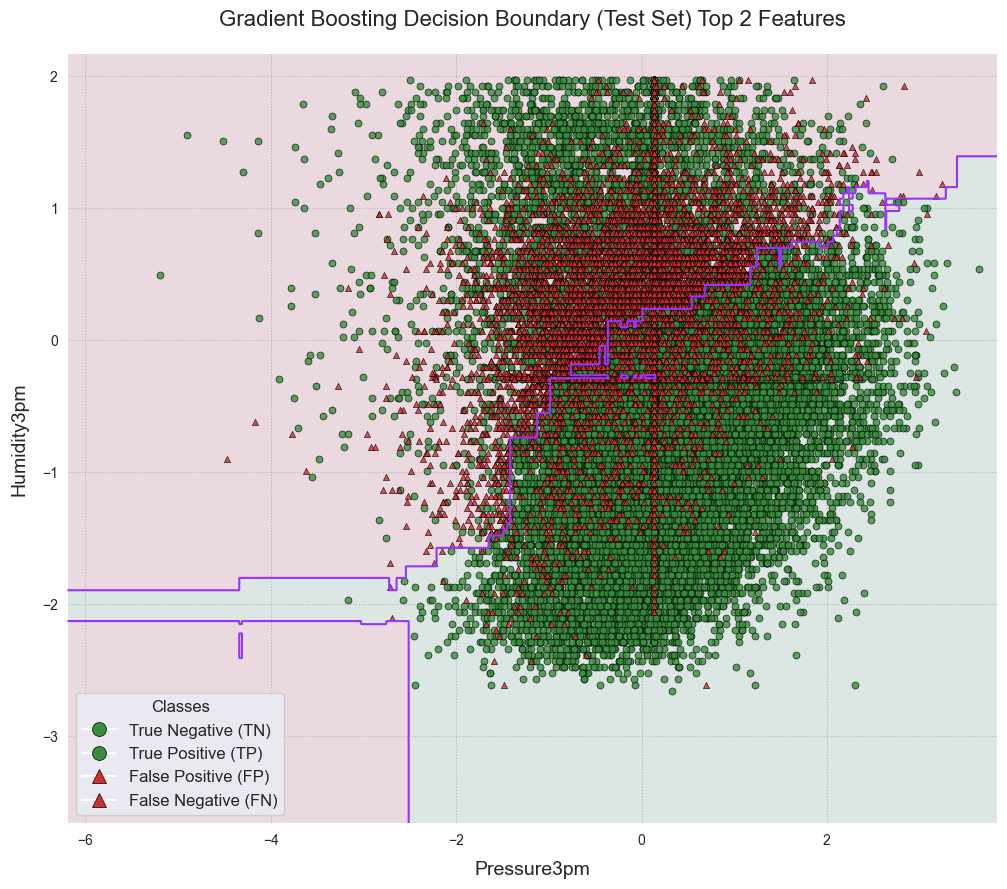

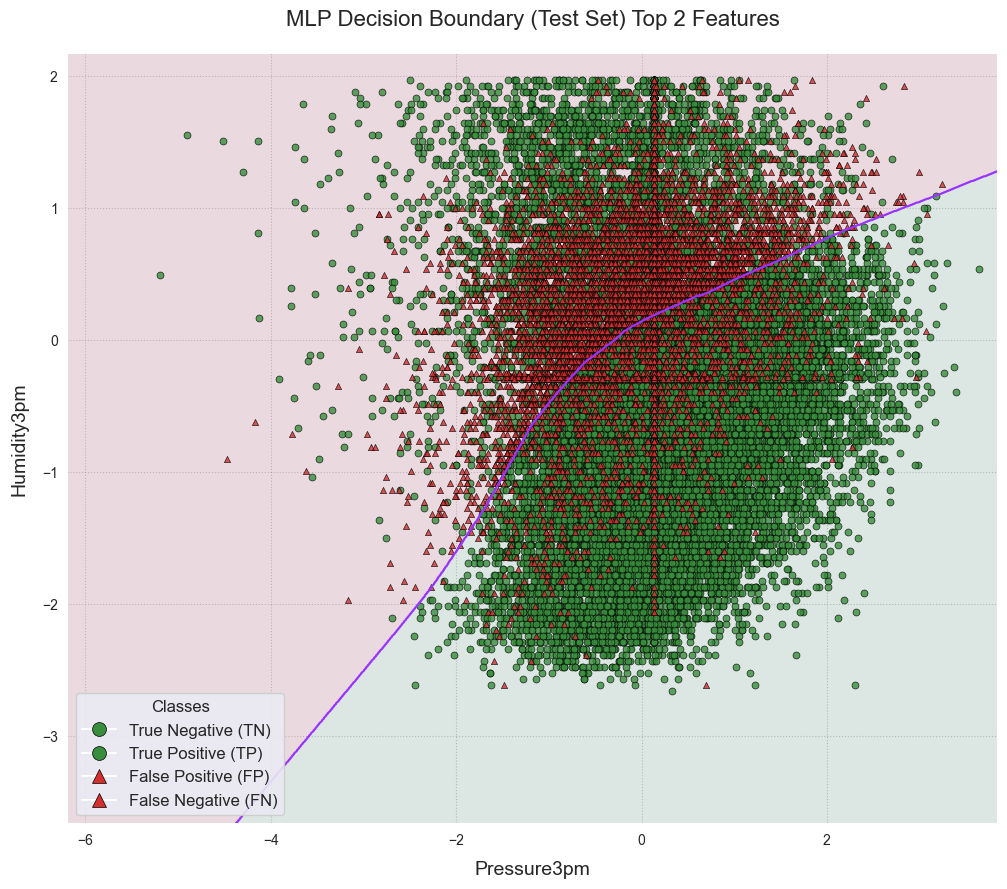

In [204]:
# A. LDA Decision Boundary
X_train_top = X_train_under[lda_top_features]
X_test_top = X_test[lda_top_features]

lda_model_top = LinearDiscriminantAnalysis()
lda_model_top.fit(X_train_top, y_train_under)
plot_decision_boundary(lda_model_top, X_test_top, y_test, 'LDA Decision Boundary (Test Set) Top 2 Features', lda_top_features)

# B. Gradient Boosting Decision Boundary
X_train_top = X_train_under[gb_top_features]
X_test_top = X_test[gb_top_features]

gb_model_top = GradientBoostingClassifier(random_state=2024)
gb_model_top.fit(X_train_top, y_train_under)
plot_decision_boundary(gb_model_top, X_test_top, y_test, 'Gradient Boosting Decision Boundary (Test Set) Top 2 Features', gb_top_features)

# C. MLP Decision Boundary
X_train_top = X_train_under[mlp_top_features]
X_test_top = X_test[mlp_top_features]

mlp_model_top = MLPClassifier(random_state=2024)
mlp_model_top.fit(X_train_top, y_train_under)
plot_decision_boundary(mlp_model_top, X_test_top, y_test, 'MLP Decision Boundary (Test Set) Top 2 Features', mlp_top_features)

### ⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯
###                           ✧ Question 5 ✧                           
### ⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

def print_metrics(y_true, y_pred, model_name):
    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Print the classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_true, y_pred))
    
    # Create a custom color map where TP and TN are green, FP and FN are red
    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=True, fmt='d', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'], 
                yticklabels=['Actual 0', 'Actual 1'],
                cmap=sns.color_palette(["red", "green"], as_cmap=True),
                annot_kws={"size": 14})

    # Custom color for each cell based on confusion matrix values
    for (i, j), val in np.ndenumerate(cm):
        if (i == j):  # Diagonal: TP or TN
            color = "green"
        else:         # Off-diagonal: FP or FN
            color = "red"
        plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor=color, lw=3))
    
    # Set titles and labels
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


### A. Linear Discriminant Analysis (LDA)

Classification Report for LDA:
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86     21874
         1.0       0.53      0.77      0.63      6284

    accuracy                           0.80     28158
   macro avg       0.73      0.79      0.75     28158
weighted avg       0.84      0.80      0.81     28158



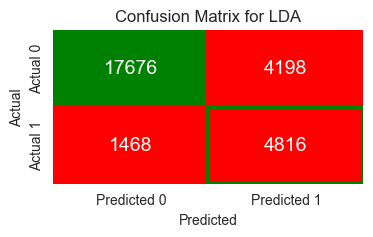

In [224]:
# A. LDA
print_metrics(y_test, lda_pred, 'LDA')


### B. Gradient Boosting

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86     21874
         1.0       0.53      0.79      0.63      6284

    accuracy                           0.80     28158
   macro avg       0.73      0.79      0.75     28158
weighted avg       0.84      0.80      0.81     28158



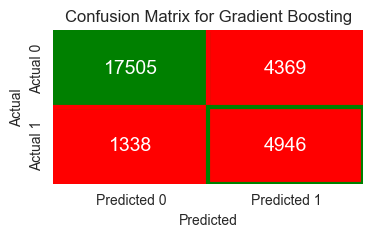

In [225]:
# B. Gradient Boosting
print_metrics(y_test, gb_pred, 'Gradient Boosting')


### C. Multi-layer Perceptron (MLP)

Classification Report for MLP:
              precision    recall  f1-score   support

         0.0       0.93      0.78      0.85     21874
         1.0       0.52      0.80      0.63      6284

    accuracy                           0.79     28158
   macro avg       0.72      0.79      0.74     28158
weighted avg       0.84      0.79      0.80     28158



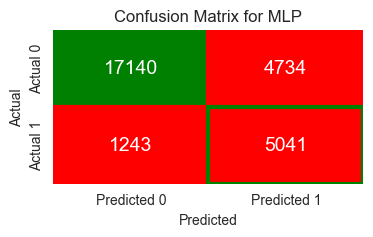

In [226]:
# C. MLP
print_metrics(y_test, mlp_pred, 'MLP')
